<div align="right"><sub>Advanced Algorithms, Semester 2, 2020</sub>
</div>


# Assessment 1
Due Date: Friday, September 4th, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---


##### Learning outcomes
- <font size="1">Critically evaluate the ecosystem of algorithmic tools available to solve complex computational problems in a variety of disciplines.</font>
- <font size="1">Choose and implement state-of-the-art algorithms and data structures solutions for a variety of computational problems.</font>
- <font size="1">Critically judge algorithmic performance and push for optimization of computational resources.</font>

## Algorithm Analysis

<ol start="1">

<li>
Carry out an experiment to evaluate the running time of the `contains` operation (as in: `variable in containerDataStructure`) in the `set` and the `tuple` container data structures of Python and plot the results of your analysis. What is the order of growth of the `contains` operation in the `set` Python data structure?
</li></ol>

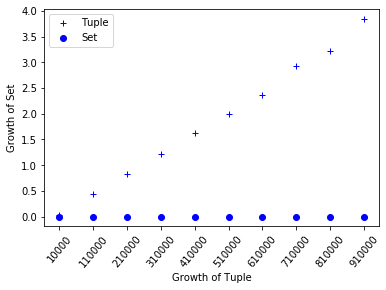

In [4]:
import timeit
import random
import matplotlib.pyplot as plt
   
listSizeStart = 10000
listSizeEnd = 1000001
stepSize = 100000
pzList = []
ptList = []
 
for i in range(listSizeStart,listSizeEnd,stepSize):
    t = timeit.Timer("random.randrange(%d) in x"%i,"from __main__ import random,x")
    x = set(range(i)) #Create a set
    lst_time = t.timeit(number=1000)
    pzList.append(lst_time)
    x = tuple(range(i)) #Create a Tuple
    d_time = t.timeit(number=1000)
    ptList.append(d_time)   
# b+ is for "blue cross"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), ptList, 'b+', label='Tuple')
# "bo" is for "blue dot"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), pzList, 'bo', label='Set')
plt.ylabel('Growth of Set')
plt.xlabel('Growth of Tuple')
plt.legend()
plt.xticks(range(listSizeStart,listSizeEnd,stepSize))
plt.xticks(rotation=50)
plt.show()


The order of growth of contains is logarihmic as it matained the same running time accross all itterations of the set

## Differential calculus

Imagine that New Zealand had a single tax rate for income. That is, everyone would pay the same tax rate regardless of how much money they make. Let's also assume that the total government revenue from taxable income (i.e. how much the government coffers collect from taxes) is well modeled by a function $f(x)$ of the taxable rate ($x$) parameterized as: 

$$\large f(x)=1000 \times 2.71^{(\frac{-(0.8x-30)^2}{2\times 0.1^2})}$$

Once again, that function describes how much money the government collects $f(x)$ as a function of a numerical tax rate $x$.

Let's plot the function $f(x)$:

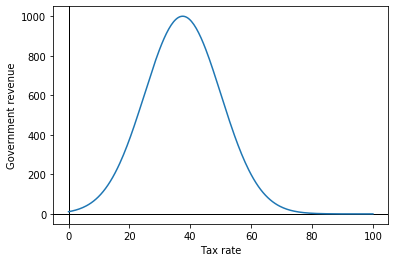

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
import numpy as np
from sympy import roots, solve, symbols

import matplotlib.pyplot as plt 


def f(x):
    #return -(1.01*x-10)**2 +82*x+100
    return 1000*2.71**(-(0.8*x-30)**2/2*0.1**2)


x = np.linspace(0,100, 256, endpoint=True)
y=f(x)
plt.axhline(linewidth=1,color = 'black')
plt.axvline(linewidth=1,color = 'black')
plt.ylabel('Government revenue')
plt.xlabel('Tax rate')

plt.show(plt.plot(x,y)) 

solve(f,x)

So in this imaginary scenario, it is easy to convince yourself that if the government would tax its citizens a 0% tax rate, it wouldn't collect any tax revenue. Look at the figure above to make sure you understand why this is the case. Arguably, if the government would tax an outrageous amount like for example 100% of your income, presumably no one would bother to work since the entire paycheck would be taken away by government in the form of taxes, so the government would also collect 0 revenue. 

Your task in this exercise is to:

<ol start="2">

<li>
Find out the appropriate tax rate that the New Zealand government should apply on its citizens in order to **maximize** its revenue using the tools of the `sympy` package for symbolic differentiation and for finding the roots/solutions of polynomial functions. 
</li></ol>

Obviously, this is a silly exercise since you can look at the plot above and figure out that the optimal tax rate would be around 40%. In the real world, models of reality are often multivariate, they depend on several independent variables, where perhaps $f(x, y, z, h)$ models government revenue as a function of $x$ (tax rate), $y$ (GDP growth), $z$ (inflation) and $h$ (unemployment rate). With such multivariate functions, you cannot look at a plot of the function since we cannot visualize functions in more than three dimensions. Hence, we need to optimize the function using algorithms for either symbolic differentiation or numerical differentiation. For this exercise, symbolic differentiation should suffice.

In [3]:
import sympy as sp

x = sp.Symbol('x')
f=1000*2.71**(-(0.8*x-30)**2/2*0.1**2)

df = sp.diff(f,x) 

sp.solve(df,x)

# 37.5

[37.5000000000000]

## Numerical integration

<ol start="3">
<li>
Let's say the following curve simulates the rate of change of trade deficits (or surpluses) in New Zealand over a 6 years time period. A trade deficit occurs when the amount of imports exceeds the amount of exports in a country). Using a numerical integration algorithm available in the `scipy` module, calculate the total volume of trade surplus from year 1 to year 3. That is, calculate the area under the curve $3(x-3)^3+(x-3)^2-10(x-3)$ from $x=1$ to $x=3$ using a numerical method.
</li></ol>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 3*(x-3)**3+(x-3)**2-10*(x-3)


x=np.linspace(0, 6)
plt.axhline(linewidth=1,color = 'black')
plt.axvline(linewidth=1,color = 'black')
plt.xlabel('Years')
plt.ylabel('Trade surplus/deficit')

                                                                                                                                                                                                                                                                                                                   
plt.plot(x,f(x)) #Plot f(x)

In [ ]:
from scipy.integrate import quad

def f(x):
    return 3*(x-3)**3+(x-3)**2-10*(x-3)

i=quad(f,1,3)
print(i)

## Differential equations

Differential equations can be used to simulate/model all sorts of physical systems. In computational neuroscience, models of neural firing are used to simulate biological neurons in silico.

A biological neuron communicates with other neurons by electrical impulses called action potentials or spikes. For example, the following figure shows the voltage of a neuron over time. Notice the existence of 6 action potentials (spikes), that is how a neuron communicates with other neurons with which it is connected via synapses. 

![](./images/nf.gif)
A popular algorithmic for simulating the spiking activity of a neuron is the Eugene Izhikevich model.

For this exercise, you need to read only the first page of the following scientific paper: [IzhikevichModel](./resources/IzhikevichModel.pdf). Don't worry about the technical details. But you need to understand the paper enough in order to extract the key 2 differential equations that govern the behavior of the rate of change of the voltage $\large \frac{dv}{dt}$ and the rate of change of the neuron's membrane recovery variable $\large \frac{du}{dt}$. 
<ol start="4">

<li>
Insert the $\large \frac{dv}{dt}$ and $\large \frac{du}{dt}$ equations in the proper locations in the code snippet below, and you should get a working model of a spiking neuron. For the constants $a$ and $b$ used the parameters suggested by the paper. Below the code snippet, I provide a visual representation of simulation output you should get if you complete the implementation of the model.
</li> </ol>

In [ ]:
from numpy import* 
from pylab import*
# simulating the Eugene Izhikevich model 


def funca(v,u,I):
    #Returns  dv/dt  
    return (0.04 * v **2) + (5 * v) + (140 - u) + I
    
def funcb(v,u):
    #Returns du/dt 
    a = 0.02
    b = 0.2
    return a * (b * v - u)
t_sim = 100 # simulation time 
dt = 0.25 #time step 
time = arange(0,t_sim,dt) 
V = zeros(len(time))
U = zeros(len(time))
V[0] = -70
U[0] = 0.2*V[0]
T1 = 1
for i in range(1,380):
    if i < 350:
        I = 14 
    else:
        I = 0
    V[i] = V[i-1] + dt*funca(V[i-1],U[i-1],I)
    U[i] = U[i-1] + dt*funcb(V[i-1],U[i-1])
    #print("%f" % V[i])
    if (V[i] >= 30):
        V[i] = -65 
        U[i] = U[i] + 6
    
            
plot(time, V )
title('Izhikevich Model')
ylabel('Membrane Potential (V)')
xlabel
show() 

![](./images/im.png)

## Linear data structures


<ol start="5">

<li>
Observe the following visual representation of an algorithm that converts a number in base 10 into its binary representation. Notice the <b>sequence</b> of computational outputs generated. Implement this algorithm using the proper linear data structure.
</li> </ol>

<img src="./images/lds1.png" width=30%/>

In [6]:
class Stack:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)


S = Stack()

num = 58

while num > 0:
    S.push(num % 2)
    num //= 2
    
while S.isEmpty() == False :
    print(S.pop())

    

1
1
1
0
1
0


<ol start="6">
<li>
Implement a Queue data structure where enqueueing an element takes $O(1)$ time and removing an element from the front of the queue takes $O(n)$. Empirically prove that this is the case using an experimental simulation and plot the results.
</li> </ol>

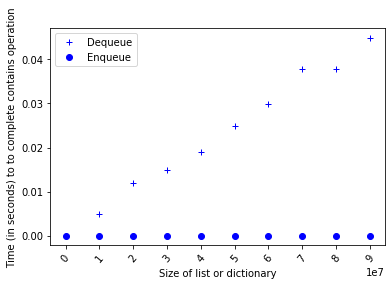

In [1]:
%matplotlib inline
import timeit
import time
import random
import matplotlib.pyplot as plt
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.append(item)

    def dequeue(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)
pzList = []
ptList = []   


listSizeStart = 1000
listSizeEnd = 100000001
stepSize = 10000000
number = 10000

tQueue = Queue()
eQueue = Queue()

for i in range(listSizeStart,listSizeEnd,stepSize):

    tQueue = Queue()
    for n in range(0,i):
        tQueue.enqueue(n)
    
    enStartTime = time.time()
    # b+ is for "blue cross"
    tQueue.enqueue(i)
    enEndTime = time.time()
    pzList.append(enEndTime - enStartTime)

    deStartTime =  time.time()

    # "bo" is for "blue dot"
    tQueue.dequeue()
    deEndTime = time.time()
    ptList.append( deEndTime-deStartTime )
    
# b+ is for "blue cross"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), ptList, 'b+', label='Dequeue')
# "bo" is for "blue dot"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), pzList, 'bo', label='Enqueue')
plt.ylabel('Time (in seconds) to to complete contains operation')
plt.xlabel('Size of list or dictionary')
plt.legend()
plt.xticks(range(listSizeStart,listSizeEnd,stepSize))
plt.xticks(rotation=50)
plt.show()

<ol start="7">
<li>
<b>(Hard)</b> Implement a Queue using just 2 instances of the provided Stack Data structure. That is, you're not allowed to use a list or any other data structure beyond the Stack, to implement your queue.
</li> </ol>

In [ ]:
# Double ended que


class Stack:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

    
class Staqueue:
    def __init__(self):
        self.instack = Stack()
        self.outstack= Stack()

    def isEmpty(self):
        if(self.instack.isEmpty and self.outstack.isEmpty):
            return True
        else:
            return False

    def enqueue(self, item):
        self.instack.push(item)

    def dequeue(self):
        if self.outstack.isEmpty:
            while not self.instack.isEmpty():
                self.outstack.push(self.instack.pop())
            return self.outstack.pop()
    def size(self):
        return self.instack.size() + self.outstack.size() 
    

    
q=Staqueue()
for i in range(10):
    q.enqueue(i)
for i in range(10):
    print(q.dequeue())

## Linked list

<ol start="8">
<li>
Add an `append` method to the `UnorderedList` data structure studied in class and modify the class accordingly so the `append` method has time complexity $O(1)$ and its implementation doesn't break the linked list structure and functionality. 
</li> </ol>

In [ ]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext
        
        
class UnorderedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        
    def isEmpty(self):
        return self.head == None
    
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count
    
    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found
    
    def remove(self,item):
        current = self.head
        previous = None
        found = False
        while not found and current.getNext():
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()
        if current == self.tail:
            self.tail = previous
        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
    
    def listPrint(self):
        printval = self.head
        while printval is not None:
            print (printval.data)
            printval = printval.next
    
    def append(self,item):
        NewNode = Node(item)
        if self.head is None:
            self.head = NewNode
            self.tail = NewNode
            return
        current = self.tail
        current.setNext(Node(item))
        self.tail = self.tail.getNext()

    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
        if self.tail == None:
            self.tail= self.head
        
mylist = UnorderedList()
mylist.append(1)
mylist.add(5)
mylist.append(9)
mylist.append(8)
mylist.append(2)
mylist.remove(1)




mylist.listPrint()



## Recursion

<ol start="9">
<li>
Let's say you want to create an algorithm that counts the number of ways in which you can go up n steps in a staircase.  Let's assume that you can take a single, double, or triple step. Your algorithm should count the total number of possible ways you have available to go up the n steps. As an illustrative example. If the staircase only has three steps, there are 4 different  ways of going up:
$$1,1,1$$
$$1,2$$
$$2,1$$
$$3$$
</li> </ol>

In [ ]:
def findStep( n) :
    if (n == 1 or n == 0) :
        return 1
    elif (n == 2) :
        return 2
     
    else :
        return findStep(n - 3) + findStep(n - 2) + findStep(n - 1)
 

n = 3
print(findStep(n))

Let's say you're working for a mega corporation with many business units. Each business unit has a candidate business opportunity to explore with an estimated cost and an associated potential profit. Furthermore, the corporation is constrained by a total budget. Let's code the data in the following manner:

```
profit = [120, 100, 60,10,50,90,100,80,40]
cost = [90, 80, 30,3,15,20,50,60,30]
Budget = 150

```

This means, business opportunity 1 costs 90 but will bring 120 in profit, Business opportunity 2, costs 80, but will bring 100 in profit... The last business opportunity costs 30 but will bring 40 in profit.

<ol start="10">
<li>
<b>(Hard)</b> Build a recursive algorithm that looks at possible combinations of business opportunities to implement in order to maximize the potential profit of the company. 
</li> </ol>
Operate under the constraint that each business opportunity can either be exploited once or not at all. The company is not allowed to repeatedly exploit a business opportunity twice or more. That is, business opportunity 1, with a cost of 90 and a profit of 120, can either be exploited only once by your algorithm or not at all. But your algorithm cannot exploit this business opportunity twice or more times. Your algorithm should only output the total potential profit. You don't need to keep track of the specific combination of business opportunities.

Hint: This problem is essentially a knapsack type of problem, a member of a family of problems that are classified as NP-Complete. NP-complete problems are particularly hard from a computational perspective because the only guaranteed way to solve them correctly is to use a brute force method where each candidate solution is tested one by one.

In [5]:
def knapSack(W, wt, val, n):
 
    if n == 0 or W == 0 :
        return 0
    if (wt[n-1] > W):
        return knapSack(W, wt, val, n-1)
    else:
        return max(
            val[n-1] + knapSack(
                W-wt[n-1], wt, val, n-1),
                knapSack(W, wt, val, n-1))
   
val = [120, 100, 60,10,50,90,100,80,40]
wt = [90, 80, 30,3,15,20,50,60,30]
W = 150
n = len(val)
print (knapSack(W, wt, val, n))

350


## Dynamic programming

<ol start="11">
<li>
<b>(Hard)</b> Implement a dynamic programming algorithm that aligns 2 genetic sequences and determines the best global alignment.
The scoring scheme to use is: match:1, mismatch:-2, gap:-1. Your algorithm should print out the total score of the alignment and the actual alignment.
</li> 
</ol>

```
Sequence 1: CTTAGCATTAGCCGTAAACCGATGGATCGTCAATATACCGCG

Sequence 2: CAGTAGCTTCAGCCTAGACCGAGGATCGAACAATATAACCCGCGCAT
```


In [2]:
import numpy as np
 
 
 
def GET_SCORE(n1, n2, penalty = -2, reward = 1):
     
    if n1 == n2:
        return reward
    else:
        return penalty
 
 
def global_alignment(X, Y, penalty = -2, reward = 1):
     
    # initialize score matrix
    score_matrix = np.ndarray((len(X) + 1, len(Y) + 1))
      
    for i in range(len(X) + 1):
        score_matrix[i, 0] = penalty * i
     
    for j in range(len(Y) + 1):
        score_matrix[0, j] = penalty * j
         
     
    # define each cell in the matrix by as the max score possible in that stage
    for i in range(1, len(X) + 1):
        for j in range(1, len(Y) + 1):
            match = score_matrix[i - 1, j - 1] + GET_SCORE(X[i - 1], Y[j - 1], penalty, reward)
            delete = score_matrix[i -1, j] + penalty
            insert = score_matrix[i, j - 1] + penalty
             
            score_matrix[i, j] = max([match, delete, insert])
             
     
    i = len(X)
    j = len(Y)
     
    align_X = ""
    align_Y = ""
    total_score = 0 
    while i > 0 or j > 0:
         
        current_score = score_matrix[i, j]
        left_score = score_matrix[i - 1, j]
         
         
        if i > 0 and j > 0 and X[i - 1] == Y[j - 1]:
            align_X = X[i - 1] + align_X
            align_Y = Y[j - 1] + align_Y
            i = i - 1
            j = j - 1
            total_score+= 1
         
        elif i > 0 and current_score == left_score + penalty:
            align_X = X[i - 1] + align_X
            align_Y = "-" + align_Y
            i = i - 1
            total_score-= 1 
        else:
            align_X = "-" + align_X
            align_Y = Y[j - 1] + align_Y
            j = j - 1
            total_score-= 1 
 
    return align_X, align_Y, total_score

X = "CTTAGCATTAGCCGTAAACCGATGGATCGTCAATATACCGCG"
Y = "CAGTAGCTTCAGCCTAGACCGAGGATCGAACAATATAACCCGCGCAT"
global_alignment(X, Y)

('CT--TAGCATT-AGCCGTAA-ACCGATGGATCGT--CAATAT-A-CCGCG---',
 'C-AGTAGC-TTCAGCC-T-AGACCGA-GGATCG-AACAATATAACCCGCGCAT',
 19)

## Linear algebra

<ol start="12">
<li>
A machine/company/organization is constrained by the following system of equations. Using the `numpy` linear algebra library, use the relevant <b>equation</b> to find the solution for $x,y,z$ that simultaneously satisfies all constraints imposed by the system below. Notice that simply calling the `solve` method of a library for solving systems of linear equations is not a valid answer. You need to computationally solve the equation yourself using matrix algebra.

$$
x + y + z = 25 \\\\
5x + 3y + 2z = 0 \\\\
y + -z = 6 \\\\
$$
</li> 

In [ ]:
import numpy as np

A = np.array([[1, 1, 1], [5, 3, 2], [0, 1, -1]])
B = np.array([[25],[0], [6]])
X = np.linalg.inv(A).dot(B)

print(X)

<ol start="13">
<li>
Think about how to use linear algebra techniques to rotate an image by a small angle clockwise. This exercise is not trivial, a computer graphics library would carry out a number of subsequent operations to optimize the result: denoising filters, translation, interpolation, etc. for the purpose of this exercise, a rough rotation with loss of image quality and improper alignment should suffice. Check the example output I provide. That's all you need to achieve. Again, simply calling the rotate method of an image processing library is not enough. You need to algorithmically solve the problem using linear algebra.
</li> </ol>

In [ ]:
from matplotlib.image import imread

image = imread('./images/ce.jpg')[:,:,0] #just getting the first of the 3 RGB channels
print(image.shape, image.dtype)


import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
# Plot the grid
plt.imshow(image)
plt.gray()
plt.show()

This is the output you are supposed to get:

![](./images/cer.png)

![](./images/ce.png)

In [ ]:
from matplotlib.image import imread
import numpy as np
image = imread('./images/ce.jpg')[:,:,0] #just getting the first of the 3 RGB channels

theta = np.radians(18)
r = np.array([[ np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])  # Rotation Matirx 
image2 = np.zeros((image.shape))
h,w = image.shape

for i in range(h):
    for j in range(w):
        newarr = r@np.array([i,j])
        try:
            image2[int(newarr[0]),int(newarr[1])] = image[i,j]
        except:
            pass




import matplotlib.pyplot as plt
 #Plot the grid
plt.figure(figsize=(9, 6))
# Plot the grid
plt.imshow(image2)
plt.gray()
plt.show()

<ol start="14">
<li>
Create a mirror representation of the following image using the appropriate modification to the solution above.
</li></ol>

In [ ]:
from matplotlib.image import imread
import numpy as np
image = imread('./images/ce.jpg')[:,:,0] #just getting the first of the 3 RGB channels

theta = np.radians(30)
r = np.array([[1, 0],[0, -1]]) # Rotation Matirx 
image2 = np.zeros((image.shape))
h,w = image.shape

for i in range(h):
    for j in range(w):
        newarr = r@np.array([i,j])
        try:
            image2[int(newarr[0]),int(newarr[1])] = image[i,j]
        except:
            pass


import matplotlib.pyplot as plt
 #Plot the grid
plt.figure(figsize=(9, 6))
# Plot the grid
plt.imshow(image2)
plt.gray()
plt.show()

This is the output you are supposed to get:

![](./images/cem.png)

<ol start="15">
<li>
A company is trying to an optimization problem subjected to the following constraints. Try to solve for $x,y,z$ and if it is not possible, try to find the closest optimal point. Do not call a method for finding the least-squares solutions. The least-squares solutions is just one application of many that the concept asked for in this question allows.

$$
x +  z = 1 \\\\
x + y + z = 2 \\\\
x + -y + z = 1 \\\\
$$
</li> </ol>

In [ ]:
import numpy as np

A = np.array([[1, 0, 1], [1, 1, 1], [1, -1, 1]])
aPlus = np.linalg.pinv(A)
aPlus

b = np.array([[1], [2], [1]])
res = aPlus.dot(b)
res

<ol start="16">
<li>
Let's say the following quadratic function $Cost=2x^2+(3+4)xy+5y^2$ represents a financial cost that your organization obviously wants to minimize. Use eigenvalue decomposition to find the minimum value of the function and its corresponding coordinates. Explicitly indicate what is the minimum in your solution and its corresponding coordinates. Obviously, this problem is trivial in 3D since you can visually inspect the function in order to estimate the optimal minimum. In real problems, equations that describe complex systems can easily hold dozens or hundreds of variables. Visualization in those situations is not possible. Hence, the need for optimization algorithms.
</li> </ol>

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return 2*x**2 + (3+4)*x*y + 5*y**2
    #return 6*x**2 + (1+2)*x*y + 5*y**2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='summer')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Cost')

ax.view_init(azim=20,elev=20)
plt.show()

In [ ]:
A = np.array([[2, 3], [4, 5]])
eigVals, eigVecs = np.linalg.eig(A)
eigVals
eigVecs

# Singular Value Decomposition as a data compression algorithm 

SVD can be used to extract the more important features from an image. Let's start by loading an image in python and convert it to a Numpy array. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
plt.style.use('classic')
img = Image.open('./images/dog.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()
imgmat.shape

<ol start="17">
<li>
Carry out singular value decomposition on the image above and reconstruct the image using only the top 50 singular vector components. What compression ratio have you achieved?
</li></ol>


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
plt.style.use('classic')
img = Image.open('./images/dog.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()
imgmat.shape


#50 singular vector components = R

<ol start="18">

<li>
The following plot shows in red the desire quantitative state of a machine or environmental variable (y axis) over time (x axis). In blue is the quantitative metric monitoring the machine or environmental variable. Improve the performance of the machine by implementing a better version of the Proportional–Integral-Derivative (PID) Controller so that the environmental estate comes (blue) resembles as close as possible the desired set state (red).</li>    

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from utils import Plant # simulator


class PIDController(object):
    def __init__(self, Kp=0.0, Ki=0.0, Kd=0.0):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.previous = 0
        self.accumulatedError = [0]
        
    def update(self, error, delta_t):
        
        delta_e = error - self.previous
        d_e = delta_e / delta_t
        self.previous = error
        
        self.accumulatedError = self.accumulatedError + error
        integral = self.accumulatedError * delta_t
        
        p = self.Kp * error
        i = self.Ki * integral
        d = self.Kd * d_e
        
        return p + i + d
    
Kp = 1.9 #tune me!
Ki = 0.5 #tune me!
Kd = 7 #tune me!
controller = PIDController(Kp, Ki, Kd)

 

plant = Plant(controller, set_shift=False,noise=True)
plant.simulate()

# Singular Value Decomposition to build a Recommendation engine

Let's say you have the following data set of the ranking different users have given to different movies on online streaming service. A 0 means that the user has not watched the movie. A 1 means that the user didn't like the movie very much. A 5 means that the user liked the movie a lot. Every number in between indicates the degree of likeness of the movie.

In [ ]:
import numpy as np
M = np.array([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 2, 0, 4, 4],
    [0, 0, 0, 5, 5],
    [0, 1, 0, 2, 2]])

In [ ]:
import pandas as pd
I = pd.Index(["Paul", "Robert", "Peter", "Susan","Maria","Sarah","Tom"], name="rows")
C = pd.Index(["Matrix mega ultra super reloaded", "Nonstop car chases", "Predatory vs Alien vs Terminator", 
              "Love at first sight in Dunedin", "Love is all you need"], name="columns")
df = pd.DataFrame(data=M, index=I, columns=C)
df

<ol start="19">

<li>
Let's say you have 2 new users (*u1* and *u2*) of your service that only watched a few of the movies and provided the following liking ratings:
    
```
u1 = np.array([0,5,4,0,0])
u2 = np.array([1,1,0,5,0])  
```

We also have 2 new movies that have already been rated by a few users:
``` 
m1 = np.array([0,5,0,0,1,0,1])
m2 = np.array([1,0,1,0,5,0,1])
```
</li>    
Your task is:

- quantify how much each of these users would like action movies and how much they would like romance movies:
- quantify whether each of the new movies is an action film or a romance film

## Artificial neural networks

Artificial neuron networks are the most powerful and successful learning algorithm that exists. In this exercise you will implement a neural network model that is trained to recognize images of handwritten digits.

Let's load a famous data set of black and white 70,000 images of handwritten digits. The data set is divided into three subsets (train, validation and test sets) as custom practice in machine learning applications. Don't worry too much about the details of the data set, the focus of this exercise is on implementing the learning algorithm. 

In [ ]:
import matplotlib.pyplot as plt
import mnist_loader
import random
import numpy as np
from sklearn.utils import shuffle

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
X_train,y_train=zip(*training_data)
X_validation,y_validation=zip(*validation_data)
X_test,y_test=zip(*test_data)

It is easy to visualize an image of the data set

In [ ]:
dataIntanceIndex=0
x = X_train[dataIntanceIndex]
pixels = np.array(x, dtype='float')
pixels = pixels.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

This data set is labeled, that is for each image we have a label of what the did the image represents. The labels are encoded as vectors, where each position in the vector identifies a particular digit (i.e. index 0 identifies the number zero, index 1 identifies the number zero, etc.

In [ ]:
y=y_train[dataIntanceIndex]
print(x)

It is easy to identify what digit the above vector represents

In [ ]:
print(np.argmax(y))

The `ANN` class below is a partial implementation of an Artificial Neural Network. The code is not optimized for speed but rather for readability. You are asked to complete the implementation of the neural network by coding the following functionality:

<ol start="20">
<li>Implement the sigmoid function using the numpy library to vectorize (i.e. accelerate) computation </li>

<ol start="21">
<li>Implement the  appropriate methods calls to carry out the Gradient descent algorithm </li>    

<ol start="22">
<li>Implement the `feedForwardInputSignal` method </li>    

<ol start="23">
<li><b>(Hard)</b> Implement the `backpropagateErrorSignal`, `calculateGradientmethod` and `updateWeights` methods. if you get it right, after training you should get a prediction accuracy on the validation set above 90% </li>    

In [ ]:
#SOLUTION
import numpy as np
import matplotlib.pyplot as plt
import mnist_loader
import random
import numpy as np
from sklearn.utils import shuffle



class ANN(object):
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in each layer of the network. For example, if the list ``sizes``
        is [2, 3, 1] then it would be a three-layer network, with the input layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The weights for the network are initialized with random values"""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.weights_W = [np.random.randn(numberOfRows,numberOfColumns) for numberOfColumns, numberOfRows in zip(sizes[:-1], sizes[1:])]
        self.inputs_Z=[np.zeros(w.shape) for w in self.weights_W]
        self.activations_A=[np.zeros(w.shape) for w in self.weights_W]
        self.deltas_D = [np.zeros(w.shape) for w in self.weights_W]
        self.gradients_G = [np.zeros(w.shape) for w in self.weights_W]
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]    
    def sigmoid(self,z): #sigmoid function
        return 1/(1 + np.exp(z))

    def sigmoid_prime(self,z): # Derivative of the sigmoid function
        return self.sigmoid(z)*(1-self.sigmoid(z))        
    
    def train(self, X_train, y_train, X_validation,y_validation, epochs, eta):
        self.eta = eta
        for epoch in range(epochs):
            X_train, y_train = shuffle(np.array(X_train), np.array(y_train))
            self.carryOutGradientDescent(X_train, y_train, X_validation,y_validation, epoch)

    def carryOutGradientDescent(self, x, y, X_validation,y_validation, epoch):  
        m_curr = b_curr = 0
        iterations = 10000
        n = float(len(x))
        learning_rate = 0.08
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        m_calc = -(2/n)*sum(x*(y-y_predicted))
        b_calc = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * m_calc
        b_curr = b_curr - learning_rate * b_calc
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
        accuracy=self.evaluate(X_validation,y_validation)
        print(f"Epoch {epoch}: {accuracy}% accuracy ")        

            
    def feedForwardInputSignal(self, x):
        """Return the output of the network given network input x"""
        activation=x
        self.activations_A = [x] # list to store all the activations, layer by layer
        for b, w in zip(self.biases, self.weights_W):
            x = np.argmax(self.sigmoid(np.dot(w, x)+b))
        return x
    
    def backpropagateErrorSignal(self, x, y):
        self.deltas_D[-1] = self.cost_derivative(self.activations_A[-1], y) * self.sigmoid_prime(self.inputs_Z[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)    
    
#     def calculateGradient(self):
#         ####-----------------
#         #
#         # YOUR CODE GOES HERE
#         #
#         ####-----------------

#     def updateWeights(self):
#         ####-----------------
#         #
#         # YOUR CODE GOES HERE
#         #
#         ####-----------------

    def predict(self,x):
        """Note that the neural network's output is assumed to be the index of whichever neuron in the final layer has the highest activation."""
        prediction = np.argmax(self.feedForwardInputSignal(x))
        return prediction
            
    def evaluate(self, X_validation, y_validation):
        correctPredictions=0
        for xIndex, x in enumerate(X_validation):
            y = y_validation[xIndex]
            prediction = self.predict(x)
            if prediction==y:
                correctPredictions+=1
        
        accuracy = correctPredictions/len(X_validation)
        return accuracy

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x \partial a for the output activations."""
        return (output_activations-y)

#Training the network    
nn = ANN([784, 30, 10])
nn.train(X_train,y_train,X_validation,y_validation, epochs=10, eta=0.3)        

### Deliverables

<ol start="24">

<li> You should hand in this python notebook file (.ipynb) containing all the necessary code to answer each of the previously enumerated tasks. Answer each question in its corresponding code cell. Use comments also to provide answers to questions expecting a natural language answer. If relevant for the task, after you implement a solution to a problem, include a bit of additional code to test/demonstrate that your solution works. Please, make sure your code runs smoothly so I can execute it in my computer. Name your Python notebook according to the following pattern: `yourLastName_ADS_A1.ipynb`. Create your own private repository for you to work on the assignment by using the following link: <a href="https://classroom.github.com/a/G6OYC4Xe">https://classroom.github.com/a/G6OYC4Xe</a>. I will subsequently fetch the repository you create on the date the assignment is due. 
</li></ol>